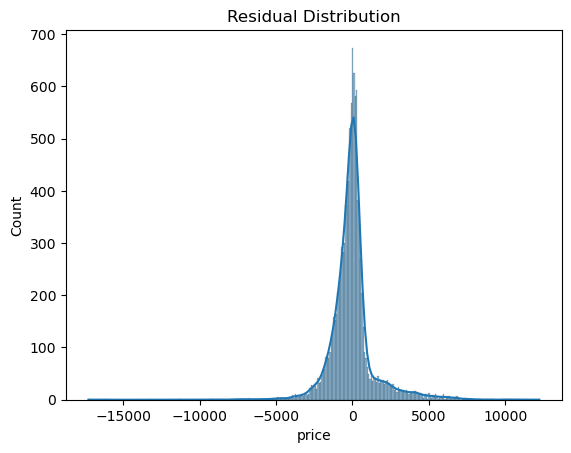

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load diamonds dataset
diamonds = sns.load_dataset("diamonds")
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']].dropna()
y = diamonds['price'].dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Plot residuals distribution
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MSE: 2235145.7856886787
MAE: 889.8987420248486
RMSE: 1495.0403960056326


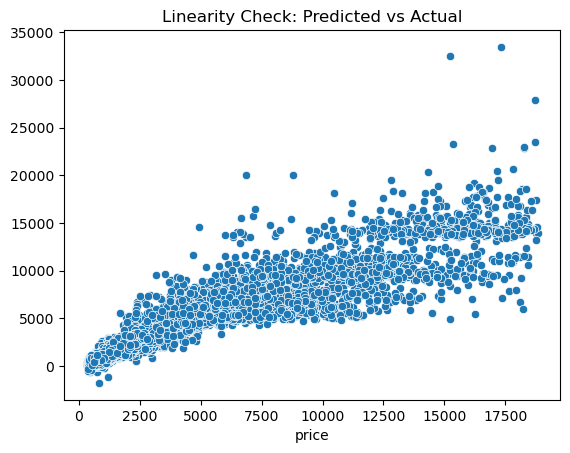

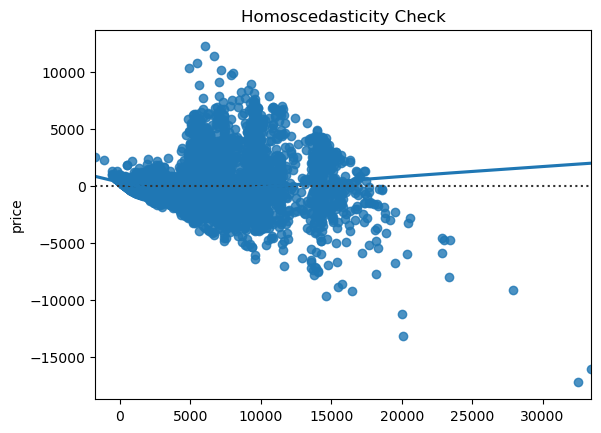

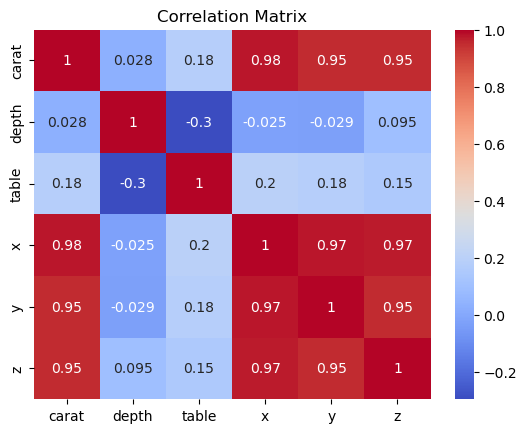

In [5]:
import pandas as pd
import seaborn as sns

# Linearity check: scatter plot
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Linearity Check: Predicted vs Actual")
plt.show()

# Homoscedasticity: Residuals plot
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.title("Homoscedasticity Check")
plt.show()

# Multicollinearity: Correlation matrix
correlation_matrix = pd.DataFrame(X).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Pipeline with scaling and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

pipeline.fit(X_train, y_train)
print("Pipeline Score:", pipeline.score(X_test, y_test))


Pipeline Score: 0.8784141643079125


In [7]:
#printing the metrics for daimonds dataset

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X_test, y_test))


Coefficients: [10748.13901014  -196.6858944   -100.23254456 -1340.26559089
    64.00001534    42.11468554]
Intercept: 20426.87253966719
R-squared: 0.858762097874875


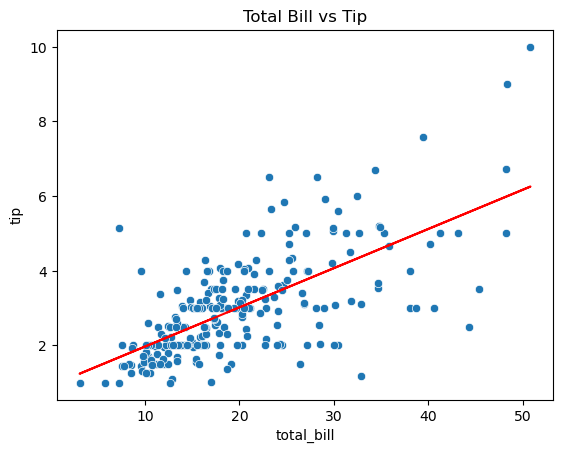

In [8]:
tips = sns.load_dataset("tips")
X = tips[['total_bill']]
y = tips['tip']

model.fit(X, y)
y_pred = model.predict(X)

sns.scatterplot(x=tips['total_bill'], y=tips['tip'])
plt.plot(tips['total_bill'], y_pred, color='red')
plt.title("Total Bill vs Tip")
plt.show()


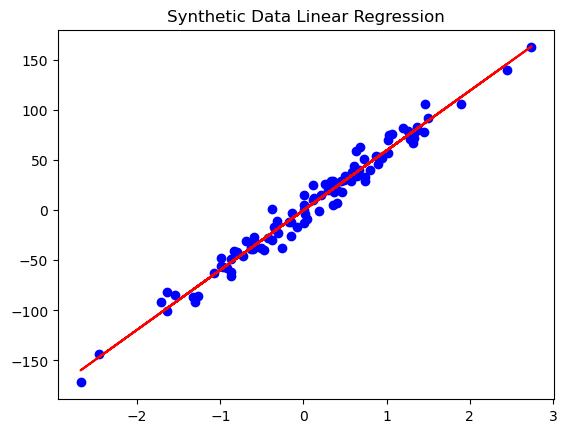

In [9]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=10)
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title("Synthetic Data Linear Regression")
plt.show()


In [10]:
import pickle

with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model Pickled!")


Model Pickled!


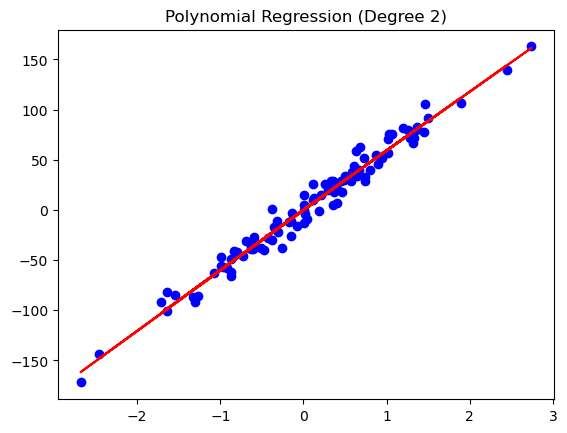

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model.fit(X_poly, y)

plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X_poly), color='red')
plt.title("Polynomial Regression (Degree 2)")
plt.show()


In [12]:
import numpy as np

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = 3 * X + 5 + np.random.randn(100, 1) * 2

# Fit linear regression
model.fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_[0])


Coefficient: [2.82879741]
Intercept: 5.711310326205954


In [13]:
degrees = [1, 2, 3, 4]
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)
    r_squared = model.score(X_poly, y)
    print(f"Degree {degree}: R-squared = {r_squared:.4f}")


Degree 1: R-squared = 0.9420
Degree 2: R-squared = 0.9422
Degree 3: R-squared = 0.9431
Degree 4: R-squared = 0.9432


In [14]:
# Generate synthetic data
X = np.random.rand(100, 2) * 10
y = 3 * X[:, 0] + 4 * X[:, 1] + 5 + np.random.randn(100)

# Fit the model
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))


Coefficients: [2.99395609 3.98397791]
Intercept: 5.026875035292655
R-squared: 0.994208101990519


In [15]:
# Generate synthetic data
X = np.random.rand(100, 2) * 10
y = 3 * X[:, 0] + 4 * X[:, 1] + 5 + np.random.randn(100)

# Fit the model
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))


Coefficients: [2.99552137 4.01335785]
Intercept: 4.845657547128013
R-squared: 0.9946645074875577


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a DataFrame with features
df = pd.DataFrame(np.random.rand(100, 3) * 10, columns=['Feature1', 'Feature2', 'Feature3'])
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data)


    Feature       VIF
0  Feature1  2.616678
1  Feature2  3.203365
2  Feature3  2.609691


ValueError: x and y must be the same size

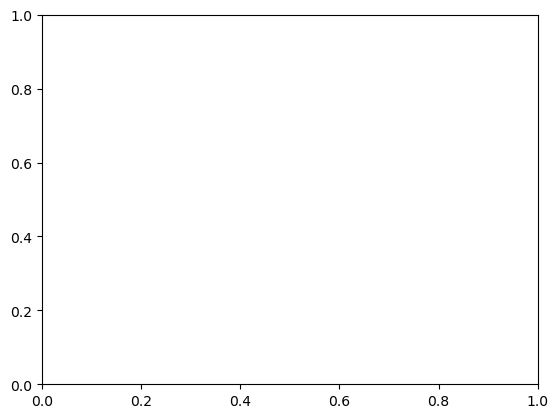

In [18]:

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model.fit(X_poly, y)

plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X_poly), color='red')
plt.title("Polynomial Regression (Degree 4)")
plt.show()


In [19]:
X = np.random.rand(100, 3) * 10
y = 3 * X[:, 0] + 2 * X[:, 1] + 4 * X[:, 2] + np.random.randn(100)

model.fit(X, y)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(X, y))


Coefficients: [2.99481299 1.98844033 3.95604484]
R-squared: 0.9967579364969931


In [21]:
from joblib import dump, load

# Serialize
dump(model, 'model.joblib')

# Deserialize
loaded_model = load('model.joblib')
print("Model loaded. R-squared:", loaded_model.score(X, y))


Model loaded. R-squared: 0.9967579364969931


In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

tips = sns.load_dataset("tips")
X = tips[['total_bill', 'sex']]
y = tips['tip']

# One-hot encode 'sex'
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['sex'])
], remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)

model.fit(X_transformed, y)
print("R-squared:", model.score(X_transformed, y))


R-squared: 0.45669999534149963
